Регрессия – это зависимость среднего значения какой-либо величины
от некоторой другой величины или от нескольких других величин. В
отличие от чисто функциональной зависимости 𝑦 = 𝑓(𝑥), когда каждому
значению независимой переменной 𝑥 соответствует одно определённое
значение зависимой переменной у, при регрессионной связи одному и тому
же значению независимой переменной (фактору) 𝑥 могут соответствовать в
зависимости от конкретного случая различные значения зависимой
переменной (отклика) у.
Изучение регрессии основано на том, что случайные величины Х и 𝑌
связаны между собой вероятностной зависимостью: при каждом
конкретном значении 𝑋 = 𝑥 величина 𝑌 является случайной величиной с
вполне определённым распределением вероятностей. Зависимость
зависимой переменной – отклика от одной независимой переменной –
фактора или нескольких факторов называется уравнением регрессии. По
количеству факторов выделяют парную (однофакторную) и
множественную (многофакторную) регрессию. Для парной будем
рассматривать следующие методы регрессии: линейную, показательную,
экспоненциальную, гиперболическую и параболическую.
Регрессионный анализ – это раздел математической статистики,
изучающий регрессионную зависимость между случайными величинами по
статистическим данным. Цель регрессионного анализа состоит в
определении общего вида уравнения регрессии, вычислении оценок
неизвестных параметров, входящих в уравнение регрессии проверке
статистических гипотез о регрессионной связи.
Таким образом, регрессионный анализ – набор статистических
методов исследования влияния одной или нескольких независимых
переменных 𝑋1, … , 𝑋𝑛 на зависимую переменную 𝑌. Независимые
переменные иначе называют регрессорами или предикторами, а зависимые
переменные – критериальными переменными.

1.1. Теоретический материал – Линейные регрессионные модели

Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).

1.1.1 Пример: Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]] 0.9999999999999997 -0.9499999999999992


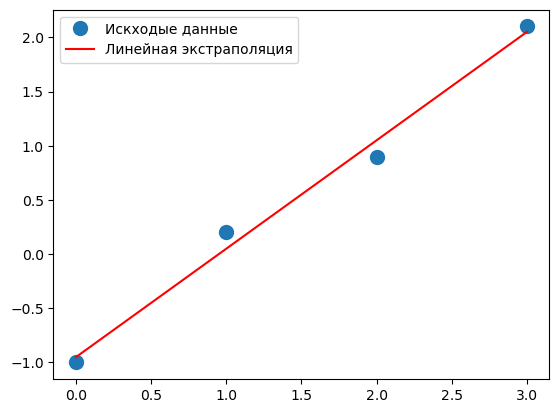

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,1,2,3])
y = np.array([-1,0.2, 0.9, 2.1])

##Перепишем линейное уравнение у = mx + с как у = Аp, где A = [[ x1 ]] u p = [[m], [c]]
#Построим А по х :
A = np.vstack([x, np.ones(len(x))]).T
A

#Используем метод lstsq для решения его отноительно вектора р
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(A, m, c)

#Построим график полученноц прямой и укажем на нем точки
plt.plot(x, y, 'o', label="Искходые данные", markersize = 10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2 Пример : пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

[-5.14253739 -4.35261325 -3.0977039  -2.13146813 -1.1609284  -0.09248434
  1.30518533  2.42016601  2.5383673   3.53291583  4.57548992]
[25.30261503 16.33200465  9.03701166  3.6496523   1.45045546  0.23802755
  1.12755578  3.72229408  8.649388   16.20424435 24.91169162]


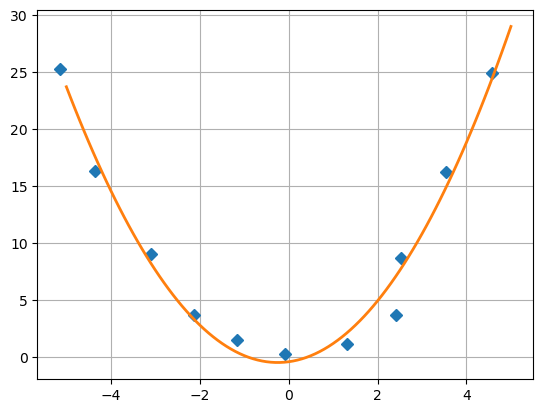

In [34]:
from numpy import *
from numpy.random import *
#Генерируем случайные х,у
delta = 1.0

x = linspace(-5, 5, 11)
y = x**2 + delta*(rand(11) - 0.5)
x += delta*(rand(11) - 0.5)

#записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

#читаем данные из файла
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep = '\n')

print(x)
print(y)

# Нахождение коэффициентов функции вида у = ах**2 + bx + с методом наименьших квадратов
# задаем вектор m = [x**2, x, E]
m = vstack((x**2, x ,ones(11))).T

# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)

# рисуем точки
plt.plot(x,y,'D')

# рисуем кривую вида у = ax**2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('parabola.png')

1.1.3 Пример: по данным предыдущего примера постройте эстраполяционного полинома третьего порядка

[-5.09093613 -4.07355723 -2.94155937 -2.36790597 -1.44612709  0.11117228
  1.26913462  2.00163609  2.7671283   3.78798886  5.40373912]
[24.5881424  16.23927089  8.93251032  3.70649536  1.00220556  0.49281296
  1.2277882   4.00187416  8.90061409 15.69338595 24.78210271]


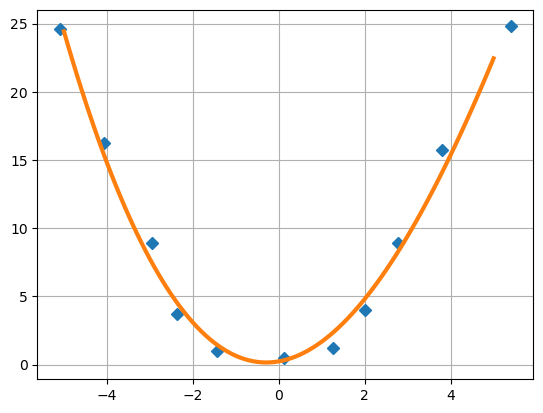

In [41]:
from numpy import *
from numpy.random import *

delta = 1.0

x = linspace(-5, 5, 11)
y = x**2 + delta*(rand(11) - 0.5)
x += delta*(rand(11) - 0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep = '\n')

print(x)
print(y)

# Нахождение коэффициентов функции вида у = ах**2 + bx + с методом наименьших квадратов
# задаем вектор m = [ч**3, x**2, x, E]
m = vstack((x**3,x**2, x ,ones(11))).T

# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
#рисуем точки
plt.plot(x,y,'D')
# рисуем кривую вида у = ax**3 + bx**2 + cх + d, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('polinom 3 st.png')
     

Задание: представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

0.9621514896066153 -2.187238881829249


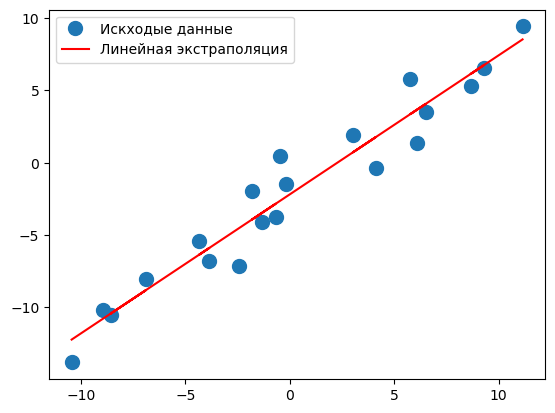

In [47]:
from numpy import *
from numpy.random import *

delta = 4.0

x = linspace(-10, 10, 20)
y = x + delta*(rand(20) - 1)
x += delta*(rand(20) - 0.5)
A = np.vstack([x, np.ones(len(x))]).T
A

m, c = np.linalg.lstsq(A, y, rcond = None)[0]

print(m,c)

plt.plot(x,y, 'o', label="Искходые данные", markersize = 10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()
     

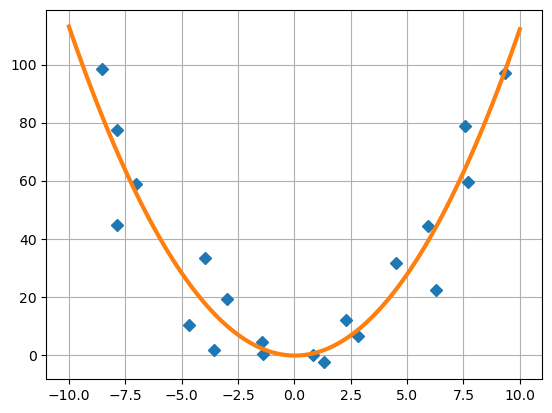

In [54]:
from numpy import *
from numpy.random import *

delta = 4.0

x = linspace(-10, 10, 20)
y = x**2 + delta*(rand(20) - 1)
x += delta*(rand(20) - 0.5)
m = vstack((x**2, x ,ones(20))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-10, 10, 101)

plt.plot(x,y,'D')

plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=3)
plt.grid()
plt.savefig('parabola.png')

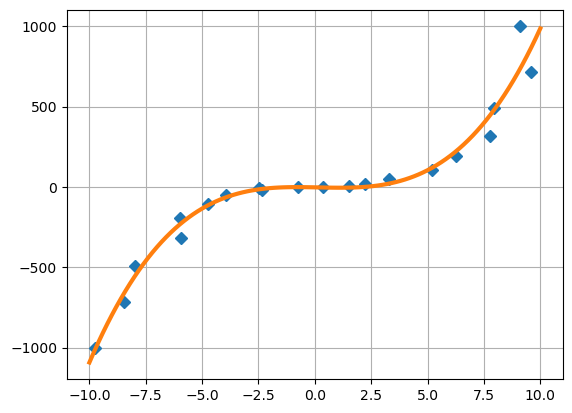

In [57]:
from numpy import *
from numpy.random import *

delta = 2

x = linspace(-10, 10, 20)
y = x**3 + delta*(rand(20) - 1)
x += delta*(rand(20) - 0.5)

m = vstack((x**3,x**2, x ,ones(20))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-10, 10, 101)

plt.plot(x,y,'D')

plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('ploinom 3 st.png')

1.1.4 Пример:Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥** 2 )

0.00017677517069296882
0.09326737554815898


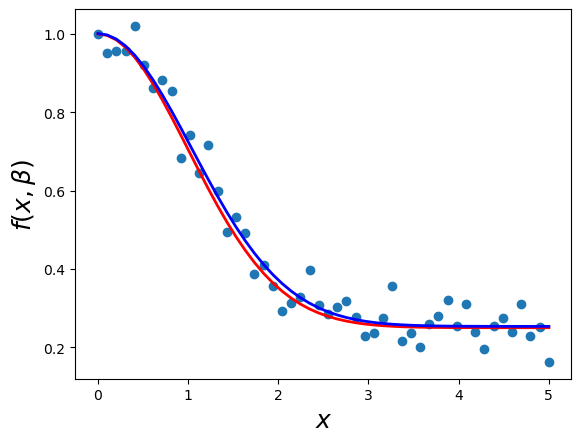

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.9985892  0.95016937 0.95564133 0.95566942 1.02035547 0.92021701
 0.86128043 0.88326621 0.85455581 0.68395883 0.74099658 0.64471257
 0.71673981 0.59867976 0.49459179 0.53214959 0.49253204 0.38644318
 0.4098574  0.35673884 0.29183161 0.31374985 0.32778108 0.39778469
 0.30886549 0.28371723 0.30317216 0.31727973 0.27778483 0.23004725
 0.236643   0.27542296 0.35680513 0.21509678 0.23583113 0.2002125
 0.25848302 0.27934113 0.31959331 0.254

In [60]:
from scipy.optimize import curve_fit

#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta  = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0 + b1 * np.exp(-b2 * x**2)

# зададим массив точек xі
xdata = np.linspace(0, 5, 50)

# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)

# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata u data
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt

#Вычислим линейное отклонение
lin_dev  = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals  = ydata -  f(xdata, * beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y , 'r', lw = 2)
ax.plot(xdata, f(xdata, * beta_opt), 'b', lw=2)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

print(xdata)
print(ydata)

1.1.5 Пример: Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида:

𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥
𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥) 4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥 𝑏1

[0.22276603 0.75484768]
0.0002016808951937476
0.17734010227587843


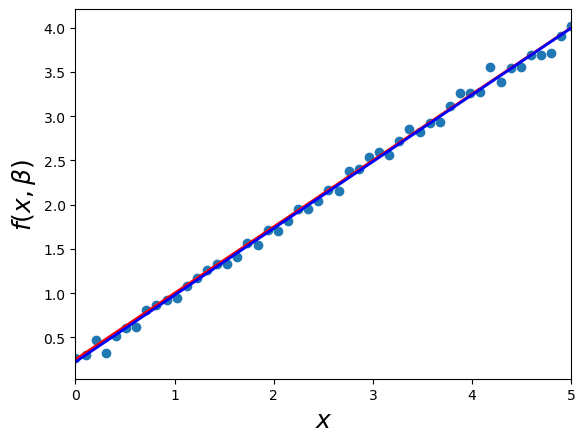

In [8]:
beta = (0.25, 0.75)

def f(x, b0, bl):
  return b0 + bl * x


xdata = np.linspace(0, 5, 50)


y = f(xdata, *beta)



ydata = y + 0.05 * np.random.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)

print(beta_opt)


lin_dev = sum(beta_cov[0])

print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)

print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.26197846 0.72864406 0.50520372]
0.00012065164367186767
0.10061084237270462


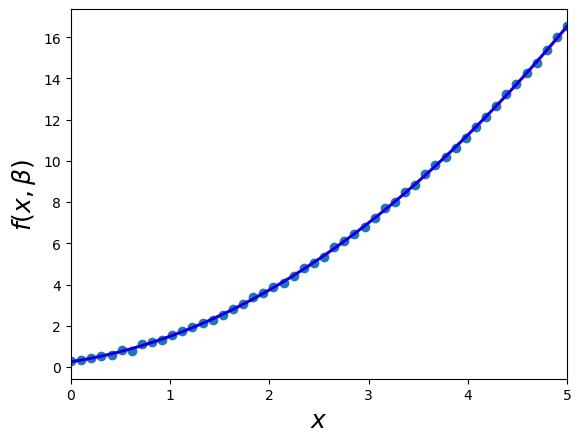

In [9]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
  return b0 + b1 * x + b2* x * x

xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print (beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.99717138 2.00910297]
5.419569074856283e-05
0.12532435356401533
0.12532435356401533


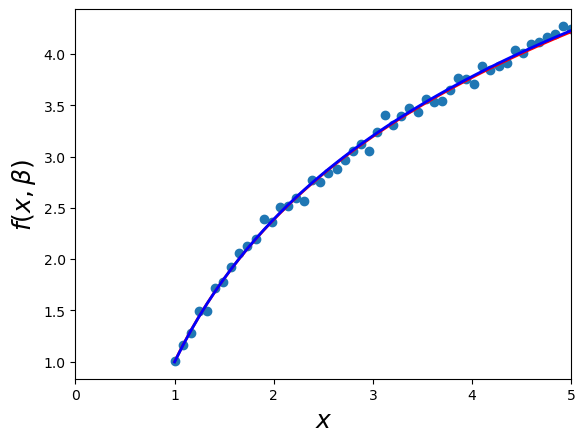

In [10]:
beta = (1, 2)
def f(x, b0, b1):
  return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn( len(xdata) )
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.00012053 1.99973612]
5.9311974185186914e-06
0.14101059273088698
0.14101059273088698


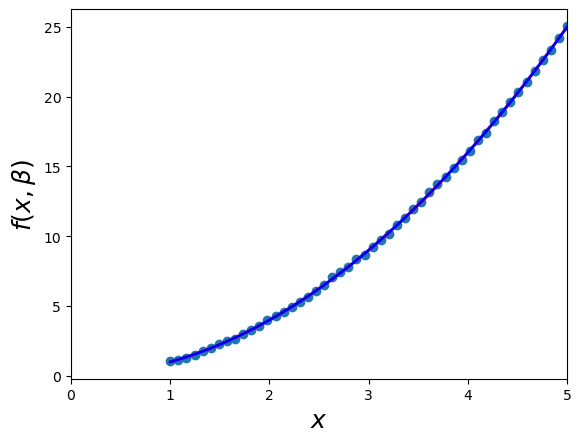

In [11]:
beta = (1, 2)
def f(x, b0, b1):
  return b0 * x ** b1

xdata = np.linspace(1, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

Задание: подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

[0.11791599 0.3582465  0.44304838]
-1.9890705071716284e-06
0.001995033600113112
0.001995033600113112


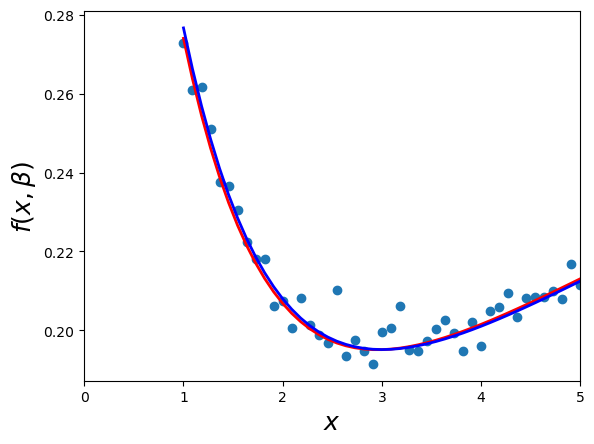

In [12]:
beta = (0.12, 0.35, 0.44)
def f(x, b0, b1, b2):
  return b0 * x ** b1  + b2 * b1 ** x

xdata = np.linspace(1,10 , 100)

y = f(xdata, *beta)

ydata = y + 0.004 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)

residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

1.2. Теоретический материал – Задачи регрессии
Линейная регрессия - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной
регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.

1.2.1 Пример построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

(21, 2)


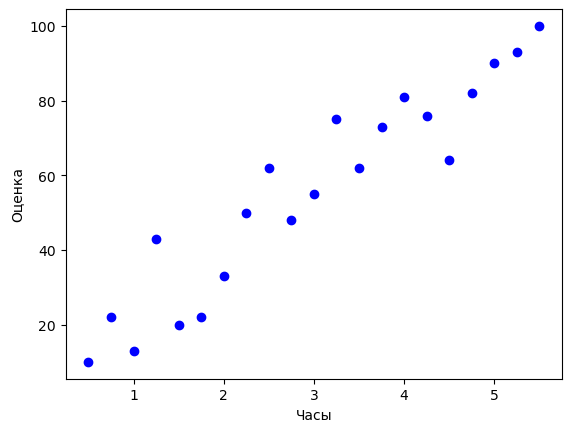

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame, Series 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


my_dict = {
    'Учебное время': [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5],
    'Оценка' : [10, 22 ,13, 43, 20, 22, 33 , 50 , 62, 48 ,55, 75, 62, 73, 81, 76, 64, 82, 90, 93, 100]
}

dataset = pd.DataFrame(my_dict)
dataset.head()

print(dataset.shape)
dataset.describe()

plt.scatter (dataset['Учебное время'], dataset['Оценка'], color = 'b', label = 'данные экзамена')
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()


После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов.

In [14]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.25]
 [5.5 ]]
[ 10  22  13  43  20  22  33  50  62  48  55  75  62  73  81  76  64  82
  90  93 100]
2.5346534653465227
[16.96181047]


Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:

(21, 2)
[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.25]
 [5.5 ]]
[ 10  22  13  43  20  22  33  50  62  48  55  75  62  73  81  76  64  82
  90  93 100]
2.5346534653465227
[16.96181047]


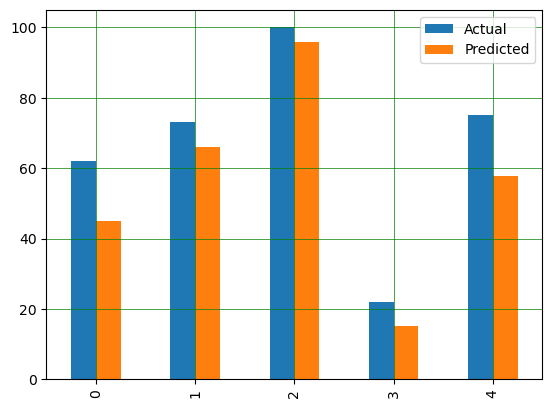

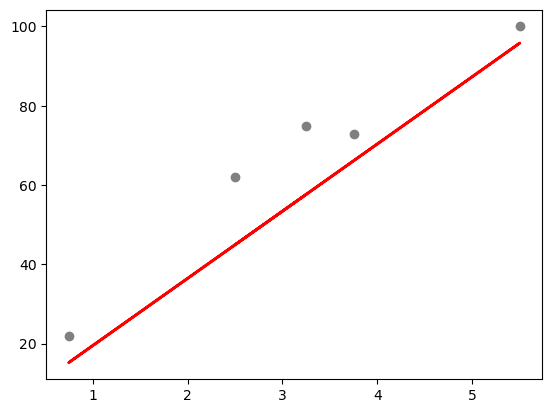

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame, Series 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


my_dict = {
    'Учебное время': [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5],
    'Оценка' : [10, 22 ,13, 43, 20, 22, 33 , 50 , 62, 48 ,55, 75, 62, 73, 81, 76, 64, 82, 90, 93, 100]
}

dataset = pd.DataFrame(my_dict)
dataset.head()

print(dataset.shape)
dataset.describe()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color = 'green')
plt.grid(which='minor', linestyle='-', linewidth='0.5', color = 'black')
plt.show()

plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, y_pred, color = 'red', linewidth=2)
plt.show()

Задание: постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы: (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv). Найдите коэффициенты линии регрессии. Постройте прогноз.

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
(30, 2)


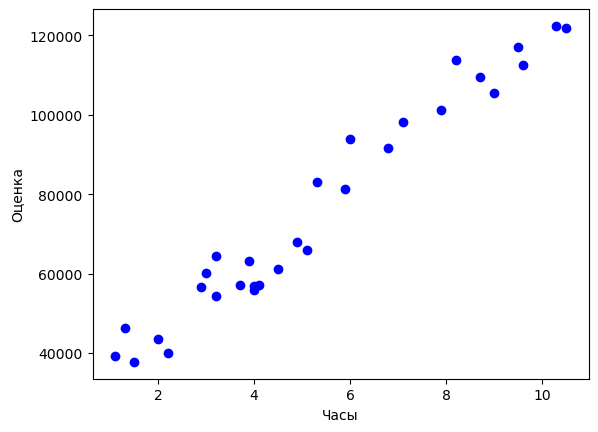

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]


In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame, Series 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'

dataset = pd.read_csv(url)
dataset.head()

print(dataset)

print(dataset.shape)
dataset.describe()

plt.scatter(dataset['YearsExperience'], dataset['Salary'], color = 'b', label = 'данные экзамена')
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

(30, 2)
[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]


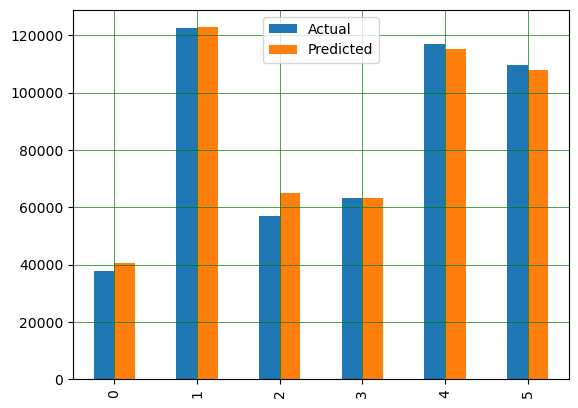

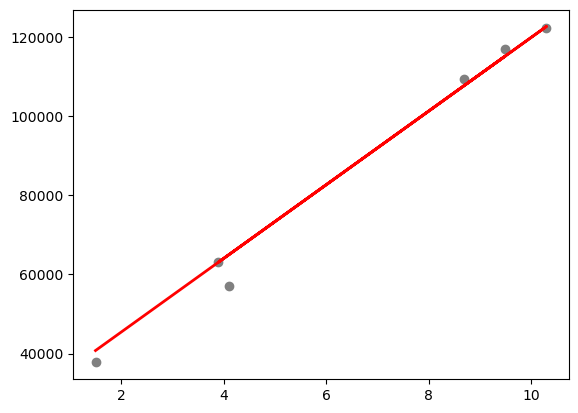

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame, Series 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'

dataset = pd.read_csv(url)
dataset.head()
dataset.head()

print(dataset.shape)
dataset.describe()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color = 'green')
plt.grid(which='minor', linestyle='-', linewidth='0.5', color = 'black')
plt.show()

plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, y_pred, color = 'red', linewidth=2)
plt.show()
     

1.3. Теоретический материал – Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом

1.3.1 Пример: Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq

In [18]:
import numpy as np

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
[4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
[4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X) 
X = np.c_[X, np.ones(X.shape[0])]  
linreg = np.linalg.lstsq(X, y, rcond=None)[0] 
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


1.3.2 Пример: для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1] 
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6], [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
print(dataset.head())

print(dataset.shape)
print(dataset.describe())

X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = None)
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

   y  x1  x2  x3
0  1   0   4   4
1  2   2   1   1
2  3   4   2   2
3  4   1   3   5
4  3   5   4   6
(23, 4)
               y         x1         x2         x3
count  23.000000  23.000000  23.000000  23.000000
mean    3.565217   5.347826   5.521739   5.043478
std     1.674029   2.404706   2.428422   2.704849
min     0.000000   0.000000   1.000000   1.000000
25%     3.000000   4.500000   4.000000   3.000000
50%     4.000000   5.000000   6.000000   5.000000
75%     5.000000   6.500000   7.500000   7.000000
max     6.000000   9.000000   9.000000   9.000000
    Coefficient
x1     0.134331
x2     0.272941
x3    -0.026447
    Actual  Predicted
21       3   3.305778
6        5   3.605166
5        4   3.224340
22       1   3.631612
1        2   2.022594
Mean Squared Error: 1.9133211391418363


Задание: Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics


y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1] 
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6], [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)
frames = [df1, df2]
dataset = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
print(dataset.head())

print(dataset.shape)
print(dataset.describe())

X = dataset[['fixed acidity', 'volatile acidity', 'citric acid']]
y = dataset['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = None)
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
     

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

-0.42857142857143055 4.3809523809523805


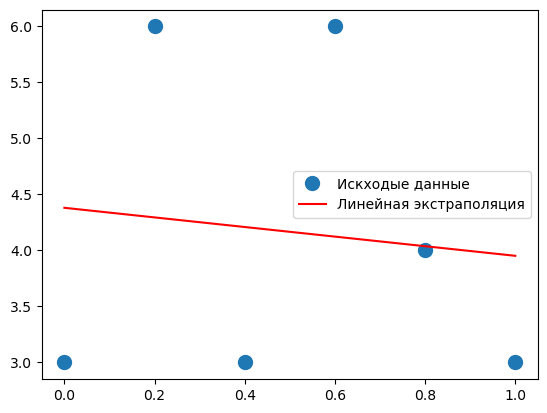

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])

A = np.vstack([x, np.ones(len(x))]).T
A

m, c = np.linalg.lstsq(A, y, rcond = None)[0]

print(m,c)

plt.plot(x,y, 'o', label="Искходые данные", markersize = 10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

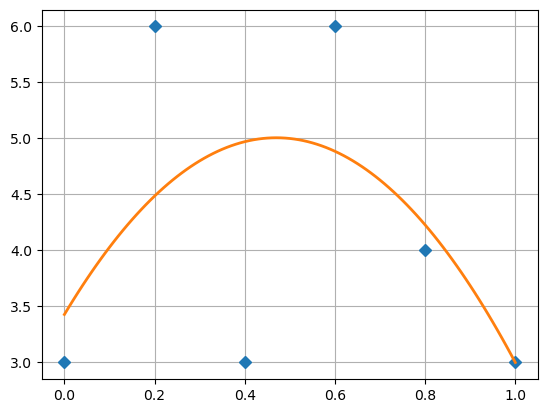

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])

m = vstack((x**2, x ,ones(6))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(0, 1, 101)

plt.plot(x,y,'D')

plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('parabola.png')